This is a project that will try to analyze how Kyler Murray and by extension the Arizona Cardinals can emulate and improve on their 2023 season. Their most successful season was 2021 by far. Although this season ended with a harsh playoff loss to the eventual SuperBowl Champs (LA RAMS), the offensive production had a great part in the teams success.

After Kyler's devastating injury in end 2022, many people have doubted Murray's ability to be a top QB in the league. Despite returning from a major injury, he demonstrated the ability to show glimpses of his 2021 form. His 2023 performance was specially significant, as he did it without one of his best offensive weapons in 2021, DeAndre Hopkins. In addition the injury to Zach Ertz and departure of Christian Kirk to free agency gave a hard blow to the AZ offensive tools available in 2023.

As the 2024 NFL Draft is approaching most experts mock the generational talent Marvin Harrison Jr. to the Arizona Cardinals. This project will aim to show how even with lackluster offensive weapons at his disposal, Kyler was able to get close to his 2021 statistically and how the addition of more talented receivers such as MHJ are needed for this team.

A limiting factor is that NFL Next Gen Stats do not have stats for MHJ since he has yet to play for any NFL team. Many draft reports suggest a good player comparison is Ceedee Lamb Green so we will use his 2020 rookie season as a data placeholder.

In [ ]:
#Import Libraries

import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
from matplotlib import style

# Display maximum columns
pd.set_option('display.max_columns', None)

In [139]:
#Scrape Database,Filter and Display for Kyler Murray Statistics
#Choose Week=0 since it corresponds to season Average
dfKM_Career=nfl.import_ngs_data(stat_type="passing")
dfKM_Career=dfKM_Career[dfKM_Career["player_display_name"]=="Kyler Murray"]
dfKM_Career=dfKM_Career[dfKM_Career["week"]==0]
dfKM_Career=dfKM_Career[dfKM_Career["season"].isin([2021,2023])]
display(dfKM_Career)

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
2912,2021,REG,0,Kyler Murray,QB,None,2.773260,5.756847,7.890607,-2.133761,...,69.230769,65.837885,3.392885,21.204686,54.282515,00-0035228,Kyler,Murray,1,K.Murray
4115,2023,REG,0,Kyler Murray,QB,ARI,2.799787,4.470170,7.070570,-2.600400,...,65.671642,68.613604,-2.941962,19.802323,56.881781,00-0035228,Kyler,Murray,1,K.Murray


In [140]:
#Noticed team_abbr is missing from 2021 season oddly. Will manually change that to avoid issues
dfKM_Career.at[2912,"team_abbr"]="ARI"
dfKM_Career

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
2912,2021,REG,0,Kyler Murray,QB,ARI,2.773260,5.756847,7.890607,-2.133761,...,69.230769,65.837885,3.392885,21.204686,54.282515,00-0035228,Kyler,Murray,1,K.Murray
4115,2023,REG,0,Kyler Murray,QB,ARI,2.799787,4.470170,7.070570,-2.600400,...,65.671642,68.613604,-2.941962,19.802323,56.881781,00-0035228,Kyler,Murray,1,K.Murray


In [137]:
#Observe what Passing Stats we have to work with
for column in dfKM_Career.columns:
    print(column)

season
season_type
week
player_display_name
player_position
team_abbr
avg_time_to_throw
avg_completed_air_yards
avg_intended_air_yards
avg_air_yards_differential
aggressiveness
max_completed_air_distance
avg_air_yards_to_sticks
attempts
pass_yards
pass_touchdowns
interceptions
passer_rating
completions
completion_percentage
expected_completion_percentage
completion_percentage_above_expectation
avg_air_distance
max_air_distance
player_gsis_id
player_first_name
player_last_name
player_jersey_number
player_short_name


In [141]:
#Display main statistics to assess and compare for Kyler
df_KM=dfKM_Career[["season","aggressiveness","completion_percentage","completion_percentage_above_expectation","avg_air_yards_to_sticks","passer_rating"]].set_index("season")
df_KM

,aggressiveness,completion_percentage,completion_percentage_above_expectation,avg_air_yards_to_sticks,passer_rating
season,,,,,
2021,12.266112,69.230769,3.392885,-1.068178,100.550069
2023,15.298507,65.671642,-2.941962,-2.336274,89.443408


Above we can see that KM had a 3% higher number of Aggressive throws(% Passing Attempts where there is defender 1 or less yds from receiver at time of completion/incompletion) in 2023. This can be explained by either him adopting a gunslinger mentality or receivers aren't open at all needing him to force the ball. 

In [142]:
#Scrape for League Average Data 
df_average=nfl.import_ngs_data(stat_type="passing")
df_average=df_average[df_average["week"]==0]
df_average=df_average[df_average["season"].isin([2021,2023])]
df_average=df_average[["season","aggressiveness","completion_percentage","completion_percentage_above_expectation","avg_air_yards_to_sticks","passer_rating"]]
df_average=df_average.groupby("season").mean()
#Display main stats for League Average Data
df_average

,aggressiveness,completion_percentage,completion_percentage_above_expectation,avg_air_yards_to_sticks,passer_rating
season,,,,,
2021,15.150122,64.307048,-0.943459,-0.937575,89.476839
2023,14.723140,64.354010,-0.171276,-1.126783,87.807741


A comparison Aggressiveness against the League Average above shows that in 2021 he was significantly better 12.27 vs a League Avg of 15.15. In 2023 he was closer to the League Average.

Also his xComp took a significant dip in 2023 compared to 2021. While this might be an indicative that he is either making bad decisions or being inaccurate with his throws, we can dig deeper into his WR Core to see if they are contributing to this dip in performance.

In [143]:
#Scrape for League Next Gen Stats regarding Receiving in 2021 and 2023
df_receiving=nfl.import_ngs_data(stat_type="receiving")
df_receiving=df_receiving[df_receiving["week"]==0]
df_receiving=df_receiving[df_receiving["season"].isin([2021,2023])]
for column in df_receiving.columns:
    print(column)
df_receiving

season
season_type
week
player_display_name
player_position
team_abbr
avg_cushion
avg_separation
avg_intended_air_yards
percent_share_of_intended_air_yards
receptions
targets
catch_percentage
yards
rec_touchdowns
avg_yac
avg_expected_yac
avg_yac_above_expectation
player_gsis_id
player_first_name
player_last_name
player_jersey_number
player_short_name


,season,season_type,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,...,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
7379,2021,REG,0,Rondale Moore,WR,ARI,7.988393,5.663637,1.111875,1.684539,...,435.0,1,8.371296,6.849622,1.521675,00-0036936,Rondale,Moore,4,R.Moore
7380,2021,REG,0,Devin Duvernay,WR,None,7.904750,3.730289,6.885106,6.165383,...,272.0,2,4.540000,4.713767,-0.173767,00-0036331,Devin,Duvernay,13,D.Duvernay
7381,2021,REG,0,Sterling Shepard,WR,NYG,7.694694,2.598858,7.991321,10.176822,...,366.0,1,3.259722,3.515494,-0.255772,00-0032385,Sterling,Shepard,3,S.Shepard
7382,2021,REG,0,Marquise Brown,WR,BAL,7.661544,3.534506,11.478082,31.928149,...,1008.0,6,4.337033,4.553453,-0.216420,00-0035662,Marquise,Brown,5,M.Brown
7383,2021,REG,0,Deonte Harris,WR,NO,7.182593,3.632328,10.362203,16.188585,...,570.0,3,6.886389,5.560030,1.326359,00-0035215,Deonte,Harris,11,D.Harris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,2023,REG,0,Michael Thomas,WR,NO,5.113833,1.996513,10.171250,13.214376,...,448.0,1,2.893333,2.512456,0.380877,00-0032765,Michael,Thomas,13,M.Thomas
10531,2023,REG,0,Trey McBride,TE,ARI,5.107714,3.464364,5.950000,16.048632,...,825.0,3,5.447037,4.495927,0.951110,00-0037744,Trey,McBride,85,T.McBride
10532,2023,REG,0,David Njoku,TE,CLE,5.078837,3.483110,4.926992,11.831337,...,882.0,6,7.611975,5.396506,2.215469,00-0033885,David,Njoku,85,D.Njoku
10533,2023,REG,0,George Pickens,WR,PIT,5.057810,2.270822,13.190000,38.397992,...,1140.0,5,6.646667,3.706050,2.940616,00-0037247,George,Pickens,14,G.Pickens


In [144]:
df_receiving=df_receiving[["season","avg_separation","catch_percentage","avg_intended_air_yards"]]
df_receiving=df_receiving.groupby(["season"]).mean()
#Show League Average for Separation
df_receiving

,avg_separation,catch_percentage,avg_intended_air_yards
season,,,
2021,3.033693,64.381481,9.932425
2023,2.987897,65.092619,9.936037


Above we can see the League average for some metrics in 2021 and 2023. It seems league averages have stayed constant for these 2 years receiving-wise.

In [145]:
#Scrape and Check for Separation 2023
df_az_receiving2023=nfl.import_ngs_data(stat_type="receiving")
df_az_receiving2023=df_az_receiving2023[df_az_receiving2023["week"]==0]
df_az_receiving2023=df_az_receiving2023[df_az_receiving2023["season"].isin([2023])]
df_az_receiving2023
df_az_receiving2023=df_az_receiving2023[["season","team_abbr","avg_separation"]]
df_az_receiving2023=df_az_receiving2023.groupby(["team_abbr"]).mean().sort_values("avg_separation", ascending=False)
df_az_receiving2023

,season,avg_separation
team_abbr,,
KC,2023.0,3.431433
MIA,2023.0,3.340412
GB,2023.0,3.313821
CHI,2023.0,3.302285
SF,2023.0,3.296471
ARI,2023.0,3.280920
DEN,2023.0,3.274296
NYG,2023.0,3.261499
BUF,2023.0,3.240220


In [114]:
#Scrape and Check for Separation 2021
df_az_receiving2021=nfl.import_ngs_data(stat_type="receiving")
df_az_receiving2021=df_az_receiving2021[df_az_receiving2021["week"]==0]
#df_az_receiving=df_az_receiving[df_az_receiving["team_abbr"]=="ARI"]
df_az_receiving2021=df_az_receiving2021[df_az_receiving2021["season"].isin([2021])]
df_az_receiving2021
df_az_receiving2021=df_az_receiving2021[["season","team_abbr","avg_separation"]]
df_az_receiving2021=df_az_receiving2021.groupby(["team_abbr"]).mean().sort_values("avg_separation", ascending=False)
df_az_receiving2021

,season,avg_separation
team_abbr,,
KC,2021.0,4.127693
ARI,2021.0,3.498530
BUF,2021.0,3.353048
SEA,2021.0,3.307697
NYJ,2021.0,3.261245
DEN,2021.0,3.254044
DET,2021.0,3.173991
TB,2021.0,3.141501
MIN,2021.0,3.125300


In a game where inches can be the difference between a win or a loss, we can see that the average separation for AZ catchers took a slight dip, falling from #2 (3.5yds) in 2021 to #6 (3.28yds) in 2023, still above average compared to league as seen below.

In [119]:
#Grab League Average Separation for both 2021 and 2023
AVG_SEP2021=df_az_receiving2021["avg_separation"].mean()
AVG_SEP2023=df_az_receiving2023["avg_separation"].mean()
print(f"The NFL Average Separation for 2021 was {AVG_SEP2021:.2f}")
print(f"The NFL Average Separation for 2023 was {AVG_SEP2023:.2f}")

The NFL Average Separation for 2021 was 3.02
The NFL Average Separation for 2023 was 3.00


Now where we start looking at the Pass Catchers for AZ in 2021 and 2023. I choose to focus on 3 metrics.
1. AVG Separation: This metric is a great way of showing either a receiver being skillful enough to run effective routes and get open or the Offensive Coordinator utilize proper schemes to get the receiver into an open spot.

2. AVG Intended Air Yards: This metric shows how many yds the ball is thrown downfield, effectively showing what level of the field the catcher is located mostly.

3. Catch Percentage: This metric shows how effective a receiver is at actually catching the ball (REC/Targets).

In [205]:
#Look at Receivers for AZ Separation in 2021
df_az_receiving2021=nfl.import_ngs_data(stat_type="receiving")
df_az_receiving2021=df_az_receiving2021[df_az_receiving2021["week"]==0]
df_az_receiving2021=df_az_receiving2021[df_az_receiving2021["team_abbr"]=="ARI"]
df_az_receiving2021=df_az_receiving2021[df_az_receiving2021["season"].isin([2021])]
df_az_receiving2021=df_az_receiving2021[["season","player_display_name","avg_separation","avg_intended_air_yards","catch_percentage"]].sort_values("avg_separation", ascending=False)
df_az_receiving2021=df_az_receiving2021.reset_index()
df_az_receiving2021



,index,season,player_display_name,avg_separation,avg_intended_air_yards,catch_percentage
0,7379,2021,Rondale Moore,5.663637,1.111875,84.375000
1,7446,2021,Christian Kirk,3.344712,11.432039,74.757282
2,7444,2021,Zach Ertz,3.160750,7.661518,66.071429
3,7485,2021,DeAndre Hopkins,2.829418,12.639062,65.625000
4,7441,2021,A.J. Green,2.494133,12.380435,58.695652


In [212]:
#MHJ Comparison
df_MHJ=nfl.import_ngs_data(stat_type="receiving")
df_MHJ=df_MHJ[df_MHJ["team_abbr"]=="DAL"]
df_MHJ=df_MHJ[df_MHJ["week"]==0]
df_MHJ=df_MHJ[df_MHJ["season"].isin([2020])]
df_MHJ=df_MHJ[df_MHJ["player_display_name"]=="CeeDee Lamb"]
df_MHJ=df_MHJ[["season","player_display_name","avg_separation","avg_intended_air_yards","catch_percentage"]].sort_values("avg_separation", ascending=False)
df_MHJ=df_MHJ.reset_index()
df_MHJ

,index,season,player_display_name,avg_separation,avg_intended_air_yards,catch_percentage
0,5931,2020,CeeDee Lamb,3.015356,9.376486,66.666667


In [216]:
#Look at Receivers for AZ Separation in 2023
df_az_receiving2023=nfl.import_ngs_data(stat_type="receiving")
df_az_receiving2023=df_az_receiving2023[df_az_receiving2023["week"]==0]
df_az_receiving2023=df_az_receiving2023[df_az_receiving2023["team_abbr"]=="ARI"]
df_az_receiving2023=df_az_receiving2023[df_az_receiving2023["season"].isin([2023])]
df_az_receiving2023=df_az_receiving2023[["season","player_display_name","avg_separation","avg_intended_air_yards","catch_percentage"]].sort_values("avg_separation", ascending=False)
df_az_receiving2023=df_az_receiving2023.reset_index()
df_az_receiving2023=pd.concat([df_az_receiving2023,df_MHJ]).reset_index()
df_az_receiving2023

,level_0,index,season,player_display_name,avg_separation,avg_intended_air_yards,catch_percentage
0,0,10422,2023,Rondale Moore,4.495608,5.064839,64.516129
1,1,10531,2023,Trey McBride,3.464364,5.950000,76.415094
2,2,10476,2023,Michael Wilson,2.648813,12.617895,64.912281
3,3,10492,2023,Marquise Brown,2.514896,11.861782,50.495050
4,0,5931,2020,CeeDee Lamb,3.015356,9.376486,66.666667


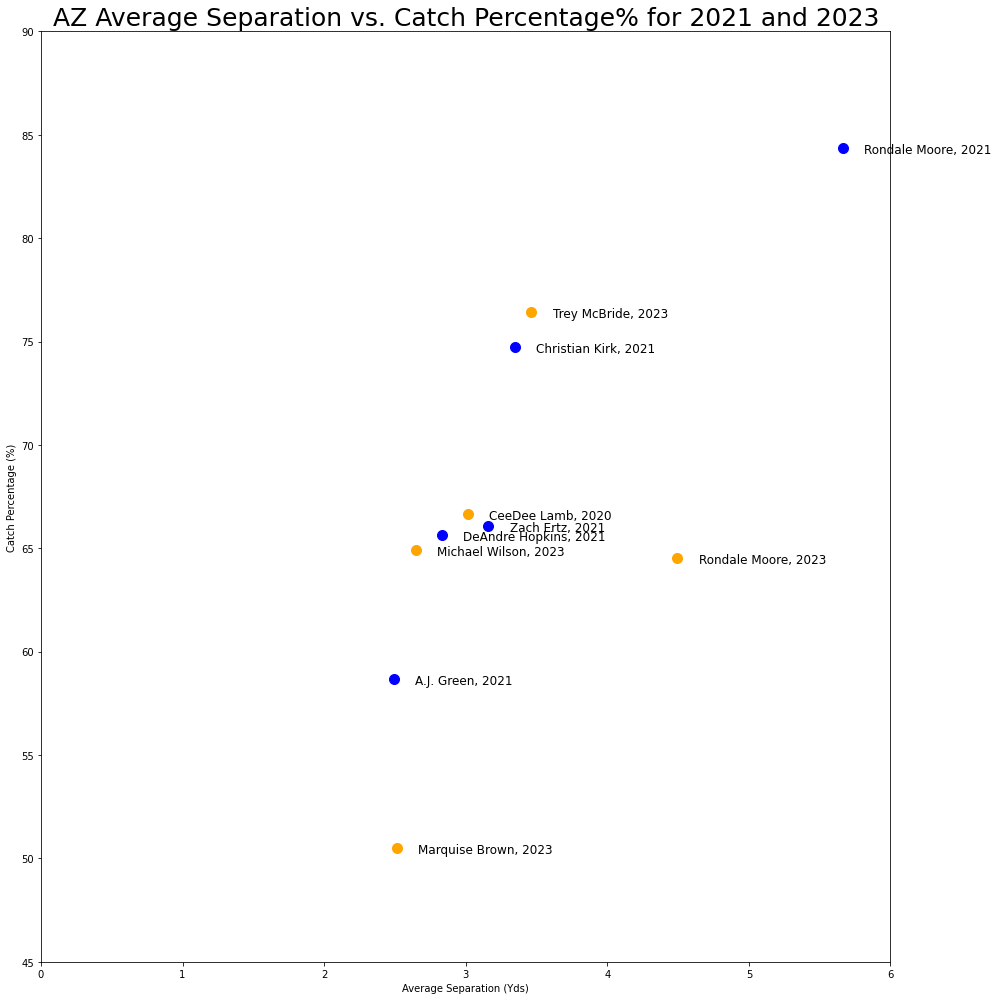

In [217]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [14, 14]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x2021 = []
y2021 = []
x2023 = []
y2023 = []

# Define the x and y variables
for catcher in df_az_receiving2021.index:
    x2021.append(df_az_receiving2021['avg_separation'][catcher])
    y2021.append(df_az_receiving2021['catch_percentage'][catcher])

for catcher in df_az_receiving2023.index:
    x2023.append(df_az_receiving2023['avg_separation'][catcher])
    y2023.append(df_az_receiving2023['catch_percentage'][catcher])
   
# Put x,y into dictionary
xy2021 = pd.DataFrame({'x' : x2021, 'y' : y2021})
xy2023 = pd.DataFrame({'x' : x2023, 'y' : y2023})

# Define the plot
fig, ax = plt.subplots()

ax.scatter(xy2021['x'], xy2021['y'], s=100, c='blue')
ax.scatter(xy2023['x'], xy2023['y'], s=100, c='orange')

# Set x and y axis limits
plt.xlim((0,6))
plt.ylim((45,90))
plt.xlabel("Average Separation (Yds)")
plt.ylabel("Catch Percentage (%)")


# Annotate with QB name and year
for nameyear in xy2021.index:
    plt.annotate(f"{df_az_receiving2021['player_display_name'][nameyear]}, {df_az_receiving2021['season'][nameyear]}",\
                 (xy2021['x'][nameyear] + 0.15,
                  xy2021['y'][nameyear]-0.25),
                  fontsize=12)
for nameyear in xy2023.index:
    plt.annotate(f"{df_az_receiving2023['player_display_name'][nameyear]}, {df_az_receiving2023['season'][nameyear]}",\
                 (xy2023['x'][nameyear] + 0.15,
                  xy2023['y'][nameyear]-0.25),
                  fontsize=12)

# Annotate Quadrants
#plt.annotate('Lots of time to throw,\nreceivers making great catches', (0.2,17.5), fontsize=18)
#plt.annotate('Limited time to throw,\nreceivers making great catches', (-0.3,17.5), fontsize=18)
#plt.annotate('Limited time to throw,\nreceivers not making great catches', (-0.3,-17.5), fontsize=18)
#plt.annotate('Lots of time to throw,\nreceivers not making great catches', (0.21,-17.5), fontsize=18)
    

# Add a title
plt.title(f'AZ Average Separation vs. Catch Percentage% for 2021 and 2023',
         fontdict={'fontsize': 25})

    
# Style the chart
plt.show()


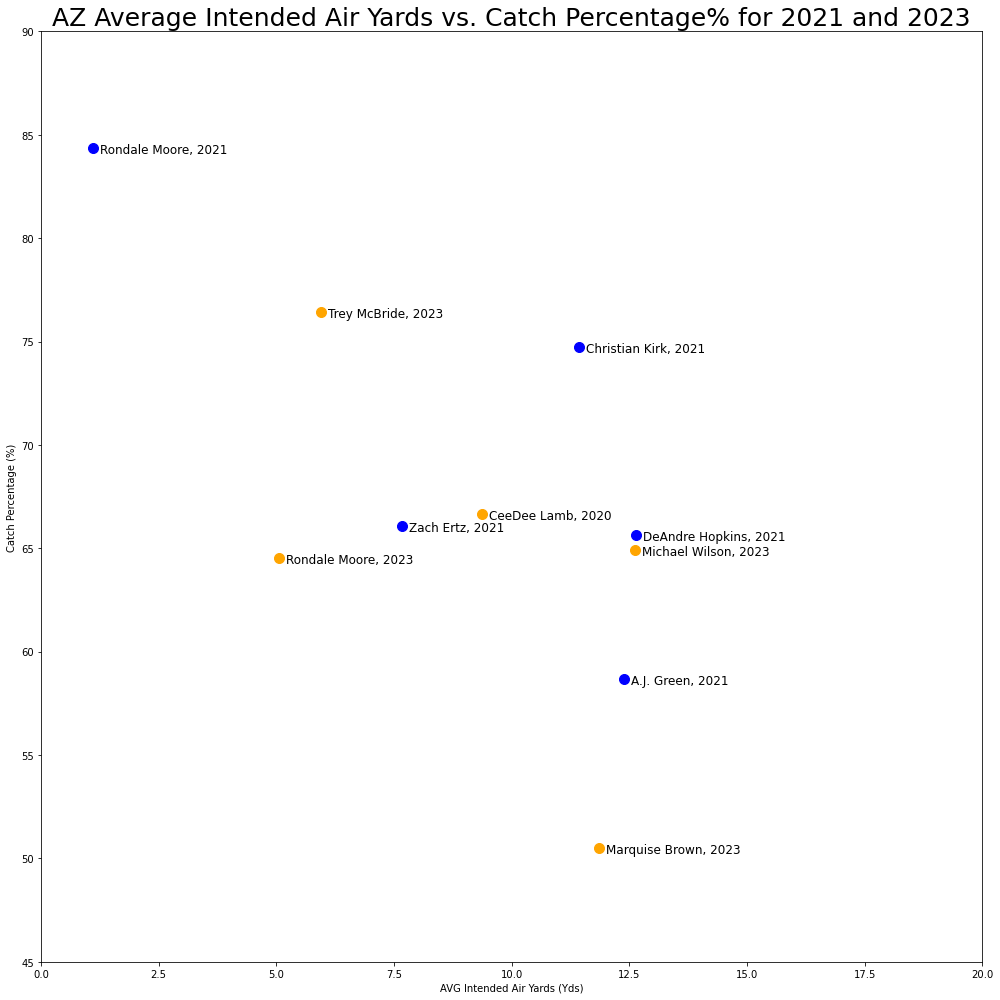

In [218]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [14, 14]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x2021 = []
y2021 = []
x2023 = []
y2023 = []


# Define the x and y variables
for catcher in df_az_receiving2021.index:
    x2021.append(df_az_receiving2021["avg_intended_air_yards"][catcher])
    y2021.append(df_az_receiving2021['catch_percentage'][catcher])

for catcher in df_az_receiving2023.index:
    x2023.append(df_az_receiving2023["avg_intended_air_yards"][catcher])
    y2023.append(df_az_receiving2023['catch_percentage'][catcher])
    
# Put x,y into dictionary
xy2021 = pd.DataFrame({'x' : x2021, 'y' : y2021})
xy2023 = pd.DataFrame({'x' : x2023, 'y' : y2023})

# Define the plot
fig, ax = plt.subplots()

ax.scatter(xy2021['x'], xy2021['y'], s=100, c='blue')
ax.scatter(xy2023['x'], xy2023['y'], s=100, c='orange')

# Set x and y axis limits
plt.xlim((0,20))
plt.ylim((45,90))
plt.xlabel("AVG Intended Air Yards (Yds)")
plt.ylabel("Catch Percentage (%)")


# Annotate with QB name and year
for nameyear in xy2021.index:
    plt.annotate(f"{df_az_receiving2021['player_display_name'][nameyear]}, {df_az_receiving2021['season'][nameyear]}",\
                 (xy2021['x'][nameyear] + 0.15,
                  xy2021['y'][nameyear]-0.25),
                  fontsize=12)
for nameyear in xy2023.index:
    plt.annotate(f"{df_az_receiving2023['player_display_name'][nameyear]}, {df_az_receiving2023['season'][nameyear]}",\
                 (xy2023['x'][nameyear] + 0.15,
                  xy2023['y'][nameyear]-0.25),
                  fontsize=12)

# Annotate Quadrants
#plt.annotate('Lots of time to throw,\nreceivers making great catches', (0.2,17.5), fontsize=18)
#plt.annotate('Limited time to throw,\nreceivers making great catches', (-0.3,17.5), fontsize=18)
#plt.annotate('Limited time to throw,\nreceivers not making great catches', (-0.3,-17.5), fontsize=18)
#plt.annotate('Lots of time to throw,\nreceivers not making great catches', (0.21,-17.5), fontsize=18)
    

# Add a title
plt.title(f'AZ Average Intended Air Yards vs. Catch Percentage% for 2021 and 2023',
         fontdict={'fontsize': 25})

    
# Style the chart
plt.show()


As you can see above, at a conservative basis, MHJ would be one of the top deep threats in the AZ arsenal Day 1. He would slot in as the #1 receiver as Michael Wilson has shown flashes but injury concerns limited him his rookie year. Harrison would certainly provide AZ with the deep threat they desperately need and the ability to stretch the field and gain separation. He would be a considerable improvement to their heralded top receveiver Marquise Brown, who ran deep routes but his meager catch percentage and below average separation were not enough to help the team.
